In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

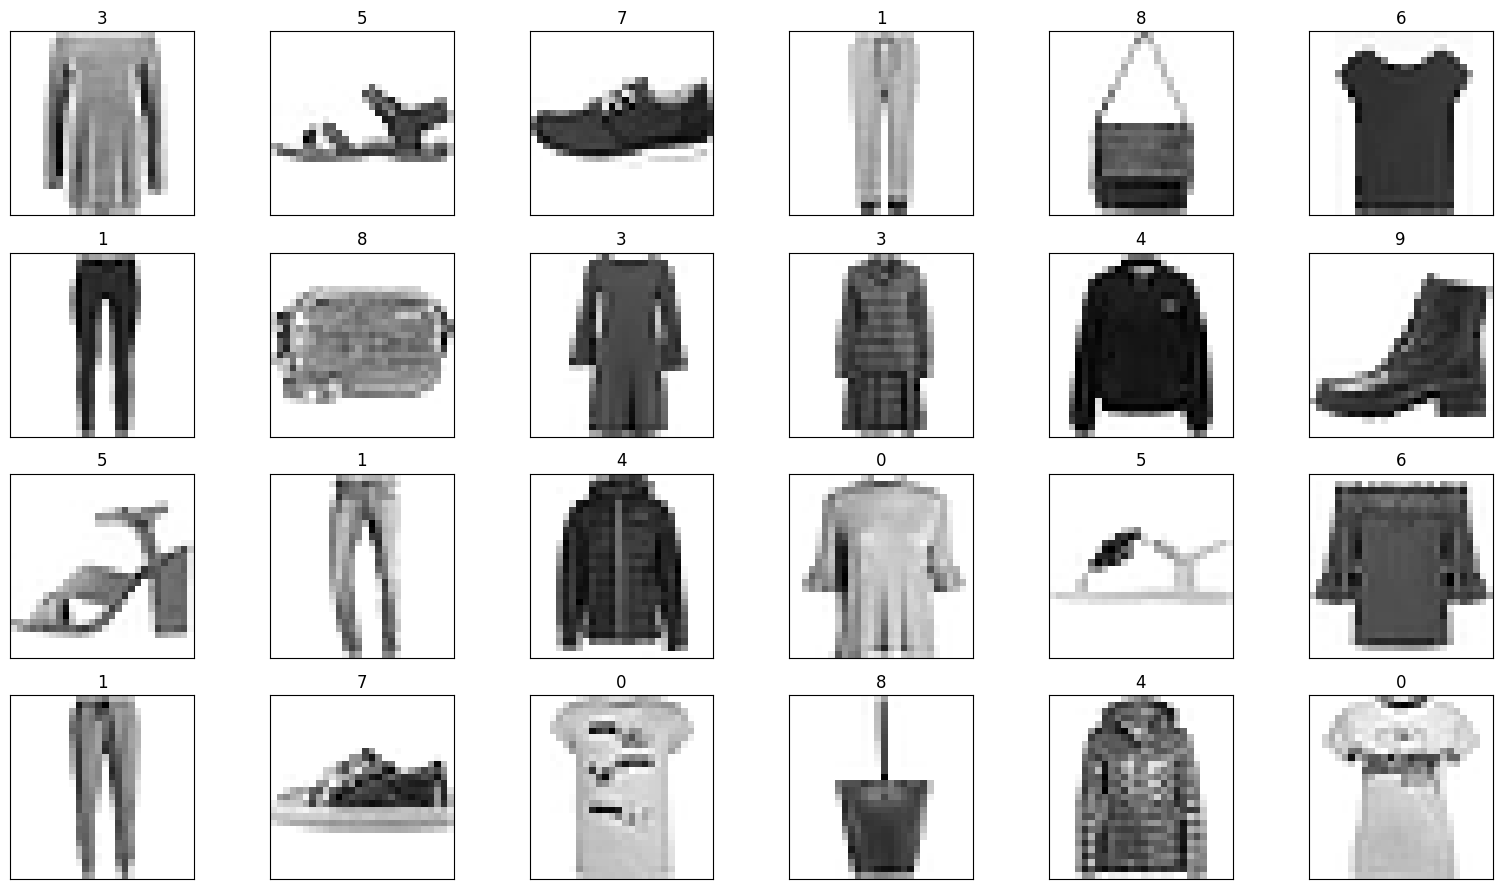

In [ ]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

In [ ]:
X_train = X_train.reshape((60000, 28, 28, 1))

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [ ]:
y_train[0]  # one sample’s categorical data

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

In [ ]:
from tensorflow.keras.models import Sequential
cnn = Sequential()

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
               input_shape=(28, 28, 1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 488,212 (1.86 MB)

 Trainable params: 488,212 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

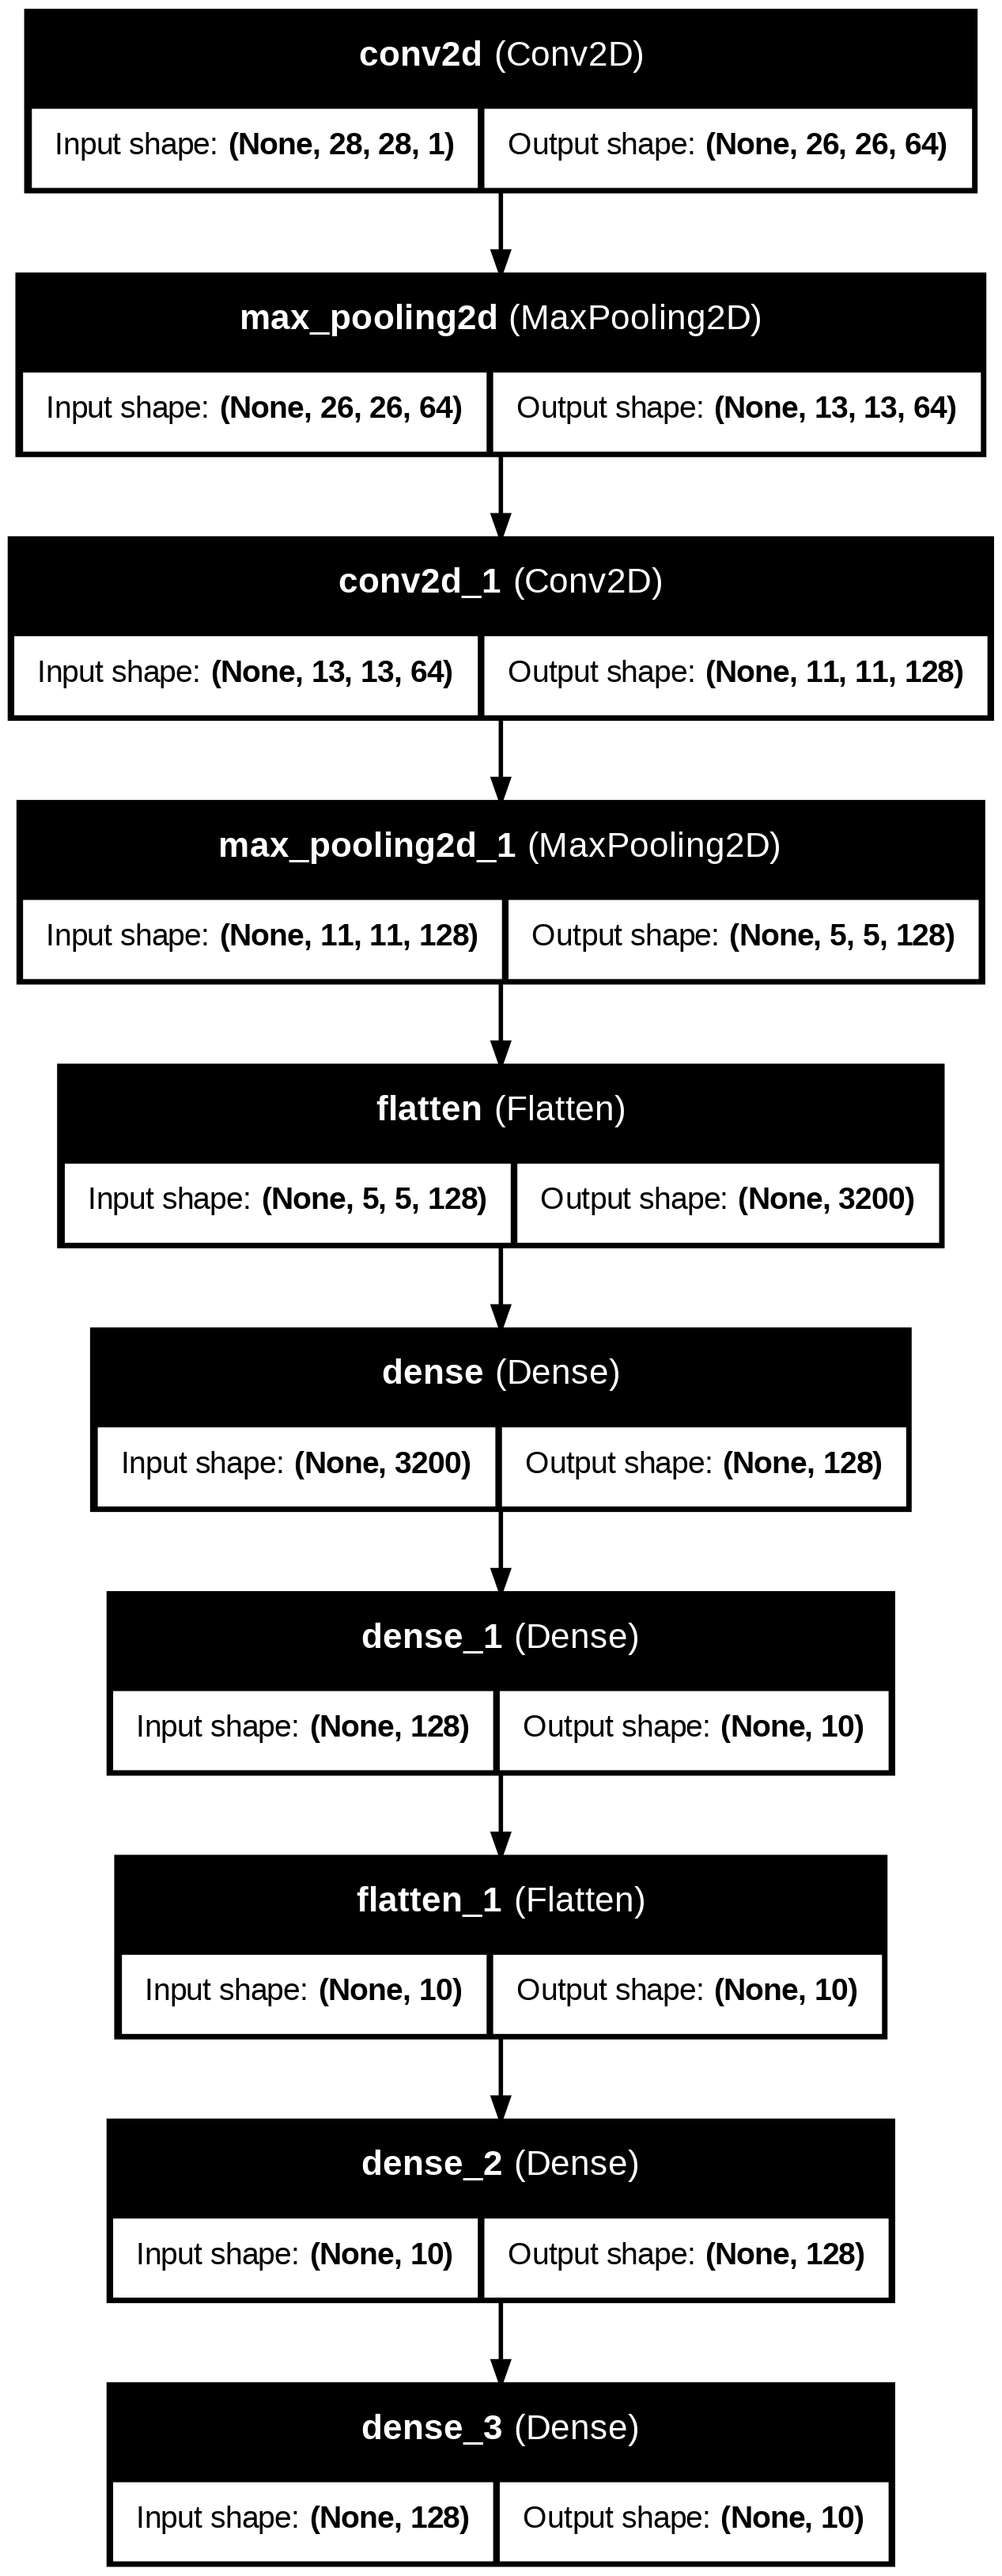

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')

In [ ]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 118s 137ms/step - accuracy: 0.4500 - loss: 1.4335 - val_accuracy: 0.7437 - val_loss: 0.6408
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 139s 134ms/step - accuracy: 0.7662 - loss: 0.5744 - val_accuracy: 0.8582 - val_loss: 0.4015
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 113s 134ms/step - accuracy: 0.8851 - loss: 0.3353 - val_accuracy: 0.8953 - val_loss: 0.3027
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 141s 133ms/step - accuracy: 0.9093 - loss: 0.2545 - val_accuracy: 0.9008 - val_loss: 0.2820
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 112s 133ms/step - accuracy: 0.9252 - loss: 0.2103 - val_accuracy: 0.9138 - val_loss: 0.2517


In [ ]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9070 - loss: 0.2821


In [ ]:
loss

0.27643391489982605

In [ ]:
accuracy

0.9068999886512756

In [ ]:
predictions = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000004172%
1: 0.0001646902%
2: 0.0000110771%
3: 0.0000083858%
4: 0.0000449866%
5: 0.0000033588%
6: 0.0001021051%
7: 0.2119827783%
8: 0.0000001011%
9: 99.7876822948%


In [ ]:
images = X_test.reshape((10000, 28, 28))

In [ ]:
incorrect_predictions = []

In [ ]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [ ]:
len(incorrect_predictions)

931

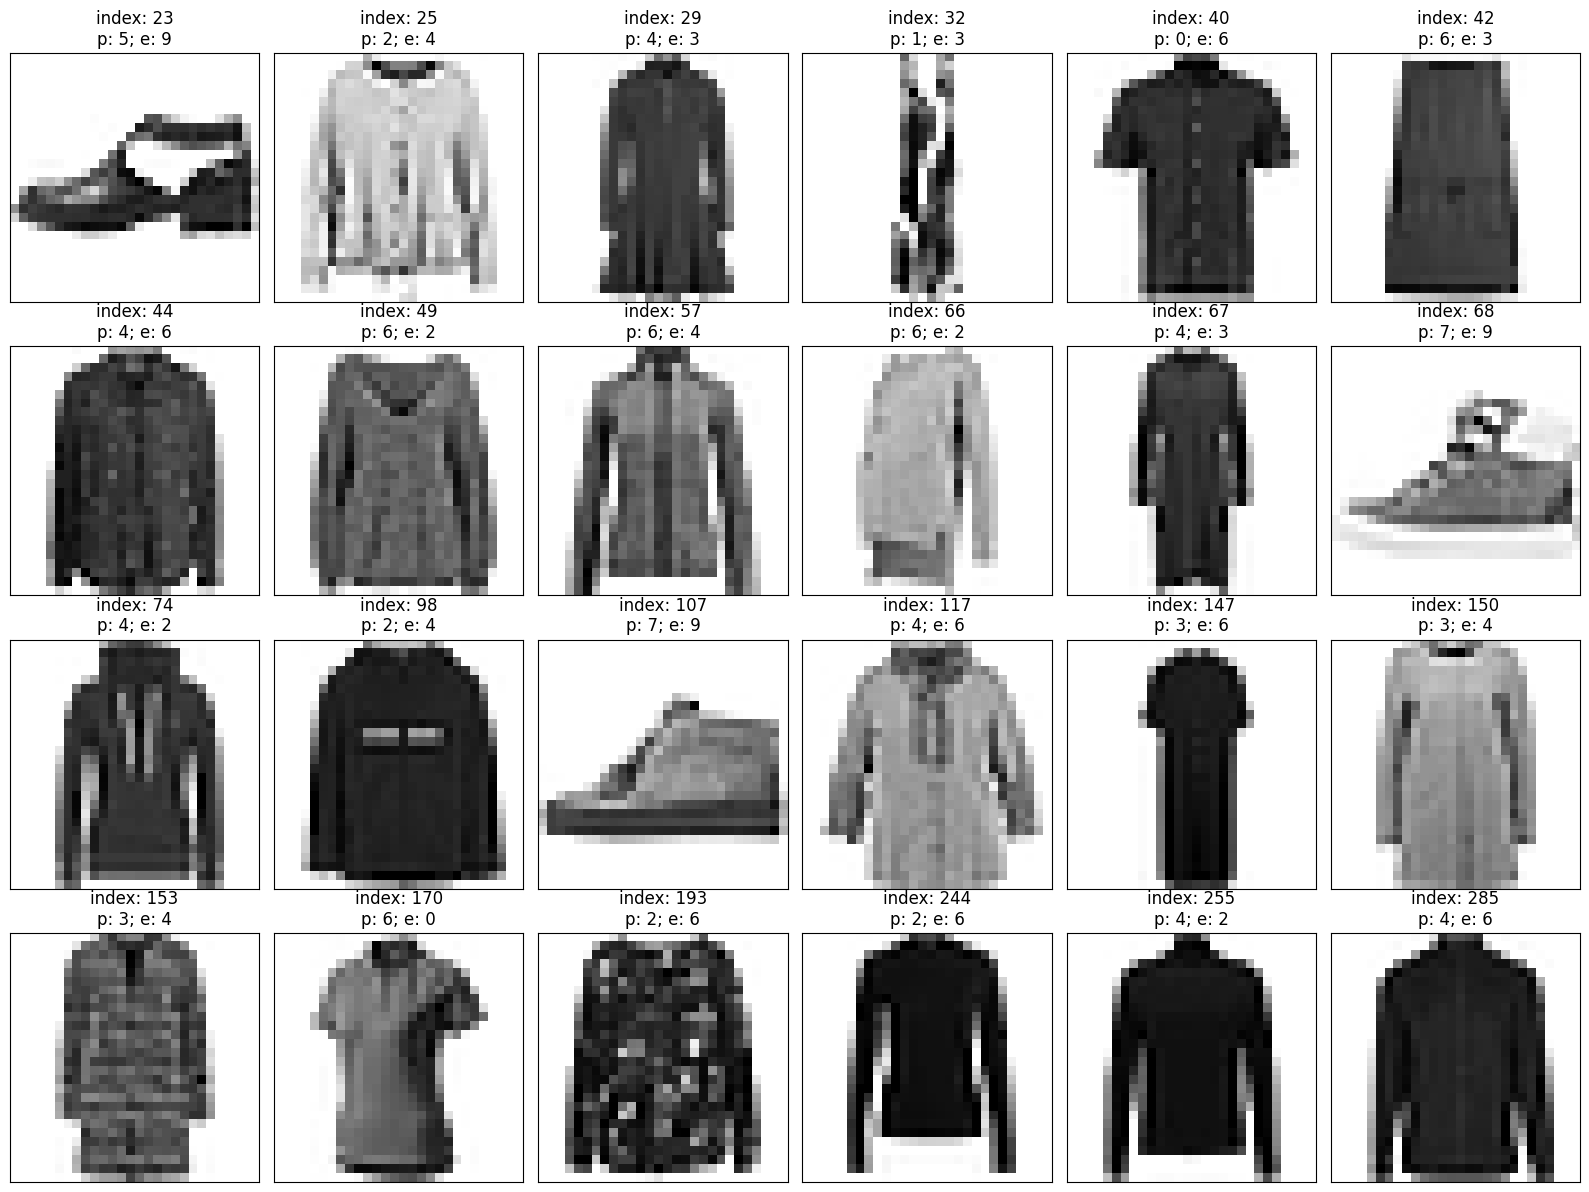

In [ ]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [ ]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [ ]:
display_probabilities(predictions[40])

0: 52.9632985592%
1: 0.0127021689%
2: 0.5378962494%
3: 0.3528822912%
4: 0.0290986296%
5: 0.0001085273%
6: 46.0832506418%
7: 0.0000096736%
8: 0.0169951600%
9: 0.0037514896%


In [ ]:
display_probabilities(predictions[153])

0: 0.0875886646%
1: 0.0206043900%
2: 0.6619198248%
3: 75.0589072704%
4: 20.8888098598%
5: 0.0111476977%
6: 3.2114773989%
7: 0.0004465420%
8: 0.0288435287%
9: 0.0302546221%


In [ ]:
display_probabilities(predictions[42])

0: 23.1776505709%
1: 0.0364236243%
2: 2.0310768858%
3: 3.7386748940%
4: 0.6682496984%
5: 0.0021589885%
6: 70.1756775379%
7: 0.0002058867%
8: 0.1396256150%
9: 0.0302590313%
